# In Class Notebook, Week 16

You can always paste the URL of this notebook (https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/blob/master/week16/inClass_week16.ipynb ) into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

In [1]:
import nltk

In [2]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('words')

In [4]:
from nltk.corpus import stopwords, words
import string
import itertools

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [5]:
filename = '/Users/jnaiman/Downloads/othello.txt'
with open(filename) as f:
    text = f.read()

In [10]:
#text.split('\n') # individual lines

In [11]:
myWords = text.split()

In [12]:
myWords

['ACT',
 'I',
 'SCENE',
 'I.',
 'Venice.',
 'A',
 'street.',
 'Enter',
 'RODERIGO',
 'and',
 'IAGO',
 'RODERIGO',
 'Tush!',
 'never',
 'tell',
 'me;',
 'I',
 'take',
 'it',
 'much',
 'unkindly',
 'That',
 'thou,',
 'Iago,',
 'who',
 'hast',
 'had',
 'my',
 'purse',
 'As',
 'if',
 'the',
 'strings',
 'were',
 'thine,',
 'shouldst',
 'know',
 'of',
 'this.',
 'IAGO',
 "'Sblood,",
 'but',
 'you',
 'will',
 'not',
 'hear',
 'me:',
 'If',
 'ever',
 'I',
 'did',
 'dream',
 'of',
 'such',
 'a',
 'matter,',
 'Abhor',
 'me.',
 'RODERIGO',
 'Thou',
 "told'st",
 'me',
 'thou',
 'didst',
 'hold',
 'him',
 'in',
 'thy',
 'hate.',
 'IAGO',
 'Despise',
 'me,',
 'if',
 'I',
 'do',
 'not.',
 'Three',
 'great',
 'ones',
 'of',
 'the',
 'city,',
 'In',
 'personal',
 'suit',
 'to',
 'make',
 'me',
 'his',
 'lieutenant,',
 "Off-capp'd",
 'to',
 'him:',
 'and,',
 'by',
 'the',
 'faith',
 'of',
 'man,',
 'I',
 'know',
 'my',
 'price,',
 'I',
 'am',
 'worth',
 'no',
 'worse',
 'a',
 'place:',
 'But',
 'he;',


In [13]:
wordsDict = {} # store words and their frequency
for word in myWords: # loop over all text
    if word in wordsDict: # if the word is already in dictionary
        wordsDict[word] += 1 #... update count
    else:# otherwise
        wordsDict[word] = 1 # ... add to dictionary

In [14]:
wordsDict

{'ACT': 5,
 'I': 803,
 'SCENE': 15,
 'I.': 7,
 'Venice.': 5,
 'A': 52,
 'street.': 4,
 'Enter': 47,
 'RODERIGO': 72,
 'and': 584,
 'IAGO': 288,
 'Tush!': 1,
 'never': 34,
 'tell': 18,
 'me;': 14,
 'take': 21,
 'it': 193,
 'much': 24,
 'unkindly': 1,
 'That': 101,
 'thou,': 4,
 'Iago,': 23,
 'who': 16,
 'hast': 18,
 'had': 53,
 'my': 368,
 'purse': 5,
 'As': 54,
 'if': 70,
 'the': 669,
 'strings': 1,
 'were': 27,
 'thine,': 1,
 'shouldst': 3,
 'know': 47,
 'of': 417,
 'this.': 6,
 "'Sblood,": 1,
 'but': 125,
 'you': 300,
 'will': 124,
 'not': 260,
 'hear': 19,
 'me:': 10,
 'If': 67,
 'ever': 20,
 'did': 51,
 'dream': 1,
 'such': 61,
 'a': 389,
 'matter,': 9,
 'Abhor': 1,
 'me.': 24,
 'Thou': 18,
 "told'st": 2,
 'me': 181,
 'thou': 115,
 'didst': 7,
 'hold': 14,
 'him': 109,
 'in': 288,
 'thy': 74,
 'hate.': 1,
 'Despise': 1,
 'me,': 32,
 'do': 170,
 'not.': 13,
 'Three': 2,
 'great': 23,
 'ones': 4,
 'city,': 2,
 'In': 31,
 'personal': 2,
 'suit': 6,
 'to': 455,
 'make': 44,
 'his': 156

In [15]:
import operator
wordsDict = sorted(wordsDict.items(), # I want to sort each key-value pair in the dictionary
                   key=operator.itemgetter(1)) # sort by the 2nd of those -- i.e. the value
# this returns a list object

In [17]:
wordsDict[::-1] # list of tuples of key-value pairs, ordered with most frequent on top

[('I', 803),
 ('the', 669),
 ('and', 584),
 ('to', 455),
 ('of', 417),
 ('a', 389),
 ('my', 368),
 ('you', 300),
 ('in', 288),
 ('IAGO', 288),
 ('OTHELLO', 287),
 ('not', 260),
 ('is', 247),
 ('that', 236),
 ('be', 195),
 ('your', 194),
 ('with', 194),
 ('it', 193),
 ('have', 187),
 ('And', 185),
 ('me', 181),
 ('DESDEMONA', 175),
 ('do', 170),
 ('he', 159),
 ('for', 157),
 ('his', 156),
 ('this', 154),
 ('her', 149),
 ('but', 125),
 ('CASSIO', 124),
 ('will', 124),
 ('EMILIA', 121),
 ('To', 117),
 ('thou', 115),
 ('she', 113),
 ('as', 110),
 ('him', 109),
 ('That', 101),
 ('so', 89),
 ('are', 88),
 ('The', 87),
 ('on', 87),
 ('shall', 83),
 ('by', 81),
 ('am', 80),
 ('What', 76),
 ('O', 74),
 ('thy', 74),
 ('But', 73),
 ('would', 72),
 ('RODERIGO', 72),
 ('if', 70),
 ('all', 68),
 ('If', 67),
 ('from', 66),
 ('what', 65),
 ('was', 64),
 ('no', 63),
 ('For', 62),
 ('O,', 62),
 ('such', 61),
 ('at', 60),
 ('My', 59),
 ('some', 59),
 ('or', 57),
 ('good', 57),
 ('you,', 55),
 ("I'll", 55

In [18]:
# back into a dictionary, that has now been sorted
wordsDict = dict(wordsDict[::-1])

In [19]:
wordsDict

{'I': 803,
 'the': 669,
 'and': 584,
 'to': 455,
 'of': 417,
 'a': 389,
 'my': 368,
 'you': 300,
 'in': 288,
 'IAGO': 288,
 'OTHELLO': 287,
 'not': 260,
 'is': 247,
 'that': 236,
 'be': 195,
 'your': 194,
 'with': 194,
 'it': 193,
 'have': 187,
 'And': 185,
 'me': 181,
 'DESDEMONA': 175,
 'do': 170,
 'he': 159,
 'for': 157,
 'his': 156,
 'this': 154,
 'her': 149,
 'but': 125,
 'CASSIO': 124,
 'will': 124,
 'EMILIA': 121,
 'To': 117,
 'thou': 115,
 'she': 113,
 'as': 110,
 'him': 109,
 'That': 101,
 'so': 89,
 'are': 88,
 'The': 87,
 'on': 87,
 'shall': 83,
 'by': 81,
 'am': 80,
 'What': 76,
 'O': 74,
 'thy': 74,
 'But': 73,
 'would': 72,
 'RODERIGO': 72,
 'if': 70,
 'all': 68,
 'If': 67,
 'from': 66,
 'what': 65,
 'was': 64,
 'no': 63,
 'For': 62,
 'O,': 62,
 'such': 61,
 'at': 60,
 'My': 59,
 'some': 59,
 'or': 57,
 'good': 57,
 'you,': 55,
 "I'll": 55,
 'they': 55,
 'must': 55,
 'As': 54,
 'hath': 53,
 'had': 53,
 'love': 52,
 'A': 52,
 'more': 51,
 'It': 51,
 'did': 51,
 'think': 49

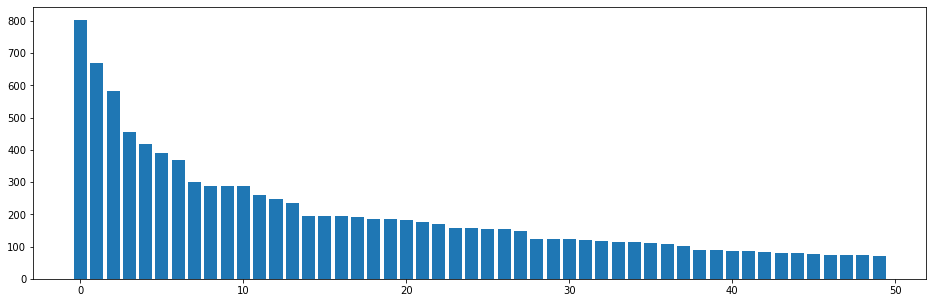

In [29]:
# finally, a plot!
n = 50 # 50 most frequent words in Othello
wordsPlot = {k:wordsDict[k] for k in list(wordsDict)[:n]} # grabbing only the nth most frequent words into a dict.

fig, ax = plt.subplots(figsize=(16,5))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

plt.show()

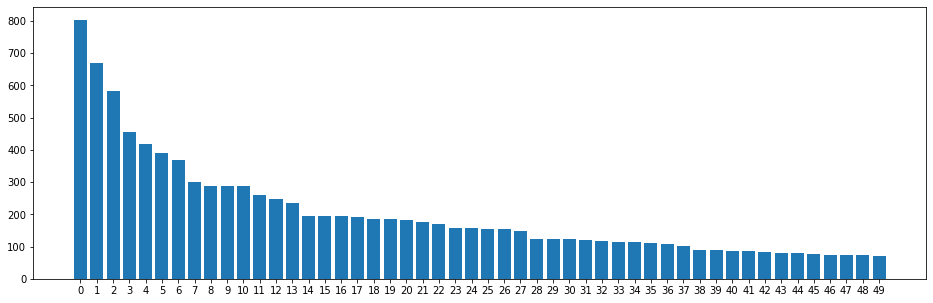

In [30]:
# finally, a plot!
n = 50 # 50 most frequent words in Othello
wordsPlot = {k:wordsDict[k] for k in list(wordsDict)[:n]} # grabbing only the nth most frequent words into a dict.

fig, ax = plt.subplots(figsize=(16,5))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

# add a tickmark for each bar
ax.set_xticks(range(len(wordsPlot)))

plt.show()

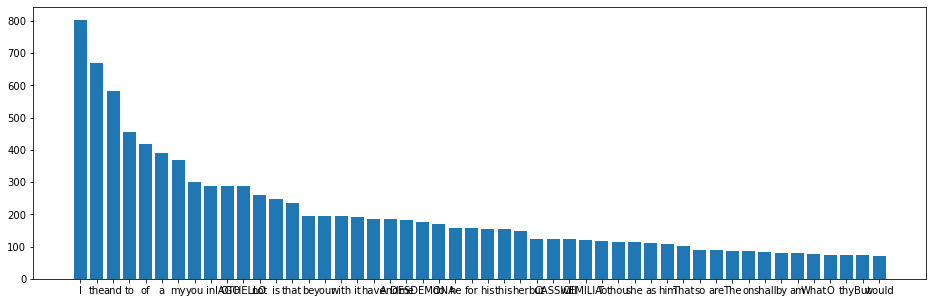

In [31]:
# finally, a plot!
n = 50 # 50 most frequent words in Othello
wordsPlot = {k:wordsDict[k] for k in list(wordsDict)[:n]} # grabbing only the nth most frequent words into a dict.

fig, ax = plt.subplots(figsize=(16,5))

ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

# add a tickmark for each bar
ax.set_xticks(range(len(wordsPlot)))
# replace tick numbers by words
ax.set_xticklabels(list(wordsPlot.keys()))

plt.show()

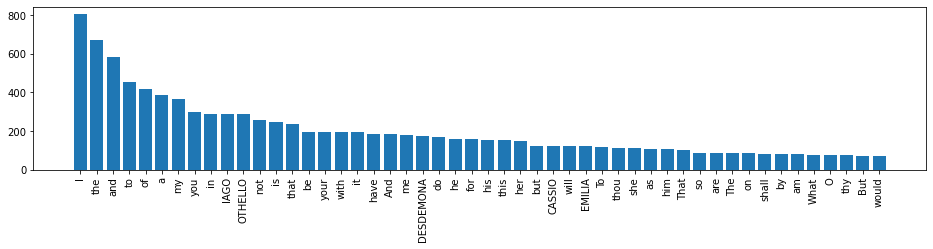

In [33]:
# finally, a plot!
n = 50 # 50 most frequent words in Othello
wordsPlot = {k:wordsDict[k] for k in list(wordsDict)[:n]} # grabbing only the nth most frequent words into a dict.

fig, ax = plt.subplots(figsize=(16,3))
ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

# add a tickmark for each bar
ax.set_xticks(range(len(wordsPlot)))
# replace tick numbers by words
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)

plt.show()

In [34]:
len(wordsDict)

6484

In [35]:
stop_words=set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [36]:
less_words = {}
for w,num in wordsDict.items():
    if w.lower() not in stop_words:
        less_words[w] = num

In [37]:
len(less_words)

6271

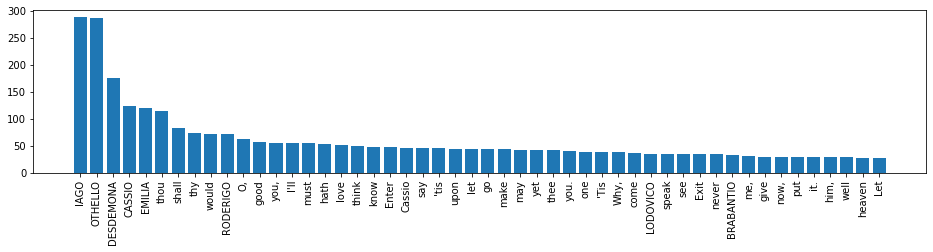

In [38]:
# finally, a plot!
n = 50 # 50 most frequent words in Othello
wordsPlot = {k:less_words[k] for k in list(less_words)[:n]} # grabbing only the nth most frequent words into a dict.

fig, ax = plt.subplots(figsize=(16,3))
ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

# add a tickmark for each bar
ax.set_xticks(range(len(wordsPlot)))
# replace tick numbers by words
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)
plt.show()

In [39]:
# we going to be a little fancier in our splitting of text data, using the NLTK package (spaCy is another NLP package)
word_tokens = nltk.word_tokenize(" ".join(myWords))

In [40]:
word_tokens

['ACT',
 'I',
 'SCENE',
 'I.',
 'Venice',
 '.',
 'A',
 'street',
 '.',
 'Enter',
 'RODERIGO',
 'and',
 'IAGO',
 'RODERIGO',
 'Tush',
 '!',
 'never',
 'tell',
 'me',
 ';',
 'I',
 'take',
 'it',
 'much',
 'unkindly',
 'That',
 'thou',
 ',',
 'Iago',
 ',',
 'who',
 'hast',
 'had',
 'my',
 'purse',
 'As',
 'if',
 'the',
 'strings',
 'were',
 'thine',
 ',',
 'shouldst',
 'know',
 'of',
 'this',
 '.',
 'IAGO',
 "'Sblood",
 ',',
 'but',
 'you',
 'will',
 'not',
 'hear',
 'me',
 ':',
 'If',
 'ever',
 'I',
 'did',
 'dream',
 'of',
 'such',
 'a',
 'matter',
 ',',
 'Abhor',
 'me',
 '.',
 'RODERIGO',
 'Thou',
 "told'st",
 'me',
 'thou',
 'didst',
 'hold',
 'him',
 'in',
 'thy',
 'hate',
 '.',
 'IAGO',
 'Despise',
 'me',
 ',',
 'if',
 'I',
 'do',
 'not',
 '.',
 'Three',
 'great',
 'ones',
 'of',
 'the',
 'city',
 ',',
 'In',
 'personal',
 'suit',
 'to',
 'make',
 'me',
 'his',
 'lieutenant',
 ',',
 'Off-capp',
 "'d",
 'to',
 'him',
 ':',
 'and',
 ',',
 'by',
 'the',
 'faith',
 'of',
 'man',
 ',',
 

In [44]:
less_words = [w for w in word_tokens if not w.lower() in stop_words]
# make a new list if that particular word in word_tokens is not also in stop_words

In [42]:
less_words

['ACT',
 'SCENE',
 'I.',
 'Venice',
 '.',
 'street',
 '.',
 'Enter',
 'RODERIGO',
 'IAGO',
 'RODERIGO',
 'Tush',
 '!',
 'never',
 'tell',
 ';',
 'take',
 'much',
 'unkindly',
 'thou',
 ',',
 'Iago',
 ',',
 'hast',
 'purse',
 'strings',
 'thine',
 ',',
 'shouldst',
 'know',
 '.',
 'IAGO',
 "'Sblood",
 ',',
 'hear',
 ':',
 'ever',
 'dream',
 'matter',
 ',',
 'Abhor',
 '.',
 'RODERIGO',
 'Thou',
 "told'st",
 'thou',
 'didst',
 'hold',
 'thy',
 'hate',
 '.',
 'IAGO',
 'Despise',
 ',',
 '.',
 'Three',
 'great',
 'ones',
 'city',
 ',',
 'personal',
 'suit',
 'make',
 'lieutenant',
 ',',
 'Off-capp',
 "'d",
 ':',
 ',',
 'faith',
 'man',
 ',',
 'know',
 'price',
 ',',
 'worth',
 'worse',
 'place',
 ':',
 ';',
 'loving',
 'pride',
 'purposes',
 ',',
 'Evades',
 ',',
 'bombast',
 'circumstance',
 'Horribly',
 'stuff',
 "'d",
 'epithets',
 'war',
 ';',
 ',',
 'conclusion',
 ',',
 'Nonsuits',
 'mediators',
 ';',
 ',',
 "'Certes",
 ',',
 "'",
 'says',
 ',',
 "'",
 'already',
 'chose',
 'officer',
 

In [45]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
no_punc_words = []
for word in less_words:
    if word not in string.punctuation:
        no_punc_words.append(word)

In [48]:
no_punc_words

['ACT',
 'SCENE',
 'I.',
 'Venice',
 'street',
 'Enter',
 'RODERIGO',
 'IAGO',
 'RODERIGO',
 'Tush',
 'never',
 'tell',
 'take',
 'much',
 'unkindly',
 'thou',
 'Iago',
 'hast',
 'purse',
 'strings',
 'thine',
 'shouldst',
 'know',
 'IAGO',
 "'Sblood",
 'hear',
 'ever',
 'dream',
 'matter',
 'Abhor',
 'RODERIGO',
 'Thou',
 "told'st",
 'thou',
 'didst',
 'hold',
 'thy',
 'hate',
 'IAGO',
 'Despise',
 'Three',
 'great',
 'ones',
 'city',
 'personal',
 'suit',
 'make',
 'lieutenant',
 'Off-capp',
 "'d",
 'faith',
 'man',
 'know',
 'price',
 'worth',
 'worse',
 'place',
 'loving',
 'pride',
 'purposes',
 'Evades',
 'bombast',
 'circumstance',
 'Horribly',
 'stuff',
 "'d",
 'epithets',
 'war',
 'conclusion',
 'Nonsuits',
 'mediators',
 "'Certes",
 'says',
 'already',
 'chose',
 'officer',
 'Forsooth',
 'great',
 'arithmetician',
 'One',
 'Michael',
 'Cassio',
 'Florentine',
 'fellow',
 'almost',
 'damn',
 "'d",
 'fair',
 'wife',
 'never',
 'set',
 'squadron',
 'field',
 'division',
 'battle

Note: could be removing more things like 's or 'd or --, but moving on for now.

In [49]:
wordsDict = {}
for word in no_punc_words:
    if word in wordsDict:
        wordsDict[word] += 1
    else:
        wordsDict[word] = 1

In [50]:
wordsDict

{'ACT': 5,
 'SCENE': 15,
 'I.': 5,
 'Venice': 18,
 'street': 5,
 'Enter': 48,
 'RODERIGO': 76,
 'IAGO': 298,
 'Tush': 1,
 'never': 34,
 'tell': 21,
 'take': 22,
 'much': 32,
 'unkindly': 1,
 'thou': 124,
 'Iago': 61,
 'hast': 18,
 'purse': 11,
 'strings': 1,
 'thine': 11,
 'shouldst': 3,
 'know': 63,
 "'Sblood": 1,
 'hear': 25,
 'ever': 27,
 'dream': 5,
 'matter': 25,
 'Abhor': 1,
 'Thou': 18,
 "told'st": 2,
 'didst': 7,
 'hold': 17,
 'thy': 74,
 'hate': 6,
 'Despise': 1,
 'Three': 2,
 'great': 23,
 'ones': 5,
 'city': 2,
 'personal': 2,
 'suit': 11,
 'make': 46,
 'lieutenant': 23,
 'Off-capp': 1,
 "'d": 153,
 'faith': 11,
 'man': 51,
 'price': 2,
 'worth': 4,
 'worse': 4,
 'place': 26,
 'loving': 4,
 'pride': 3,
 'purposes': 3,
 'Evades': 1,
 'bombast': 1,
 'circumstance': 3,
 'Horribly': 1,
 'stuff': 2,
 'epithets': 1,
 'war': 6,
 'conclusion': 4,
 'Nonsuits': 1,
 'mediators': 1,
 "'Certes": 1,
 'says': 6,
 'already': 10,
 'chose': 2,
 'officer': 6,
 'Forsooth': 1,
 'arithmetician': 

In [51]:
wordsDict = sorted(wordsDict.items(), # I want to sort each key-value pair in the dictionary
                   key=operator.itemgetter(1)) # sort by the 2nd of those -- i.e. the value
wordsDict = dict(wordsDict[::-1])

In [52]:
wordsDict

{'IAGO': 298,
 'OTHELLO': 296,
 "'s": 223,
 'DESDEMONA': 186,
 '--': 162,
 "'d": 153,
 'CASSIO': 130,
 'EMILIA': 125,
 'thou': 124,
 'Cassio': 122,
 'lord': 89,
 'shall': 86,
 'love': 80,
 'thee': 76,
 "'ll": 76,
 'RODERIGO': 76,
 'thy': 74,
 'would': 72,
 'good': 68,
 'say': 65,
 'well': 63,
 'know': 63,
 'Iago': 61,
 'think': 60,
 'Moor': 57,
 "'t": 57,
 'must': 57,
 'hath': 55,
 'go': 54,
 'come': 53,
 'heaven': 53,
 'one': 52,
 'yet': 52,
 'man': 51,
 'let': 50,
 'may': 49,
 'Enter': 48,
 'speak': 47,
 'upon': 46,
 'sir': 46,
 'make': 46,
 'Desdemona': 43,
 "'T": 41,
 'see': 41,
 'LODOVICO': 39,
 'honest': 38,
 'wife': 38,
 'BRABANTIO': 36,
 'Othello': 34,
 'us': 34,
 'Exit': 34,
 'never': 34,
 'Let': 33,
 'soul': 33,
 'general': 32,
 'give': 32,
 'much': 32,
 'Come': 31,
 'put': 31,
 'night': 31,
 'MONTANO': 30,
 'handkerchief': 29,
 'world': 29,
 'time': 29,
 'heart': 28,
 'Roderigo': 28,
 'Ay': 27,
 'DUKE': 27,
 'true': 27,
 'thus': 27,
 'ever': 27,
 'hand': 26,
 'VENICE': 26,
 

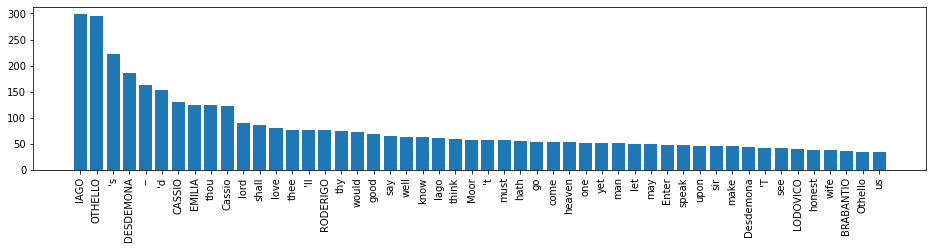

In [53]:
# finally, a plot!
n = 50 # 50 most frequent words in Othello
wordsPlot = {k:wordsDict[k] for k in list(wordsDict)[:n]} # grabbing only the nth most frequent words into a dict.

fig, ax = plt.subplots(figsize=(16,3))
ax.bar(range(len(wordsPlot)), list(wordsPlot.values()), align='center')

# add a tickmark for each bar
ax.set_xticks(range(len(wordsPlot)))
# replace tick numbers by words
ax.set_xticklabels(list(wordsPlot.keys()))

plt.xticks(rotation=90)
plt.show()

In [54]:
wordcloud = WordCloud().generate_from_frequencies(wordsDict)

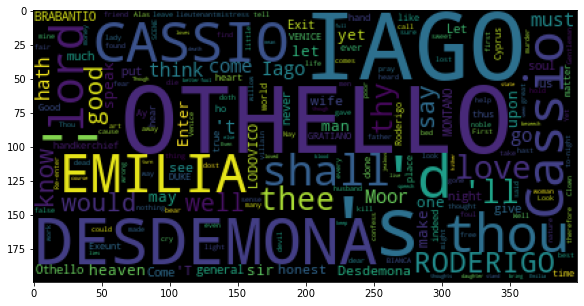

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(wordcloud)
plt.show()

# Time for network viz!

In [56]:
import bqplot
import ipywidgets
import pandas as pd

In [57]:
# data
node_data = [
    {"label": "Luke Skywalker", "media": "Star Wars", "shape": "rect"},
    {"label": "Jean-Luc Picard", "media": "Star Trek", "shape": "rect"},
    {"label": "Doctor Who", "media": "Doctor Who", "shape": "rect"},
    {"label": "Pikachu", "media": "Detective Pikachu", "shape": "circle"},
]

#mark that is using bqplot's Graph
graph = bqplot.Graph(node_data=node_data, 
                    colors=["red","red","red","red"])

fig = bqplot.Figure(marks=[graph])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(colors=['red', 'red', 'red'…

In [65]:
# data
# nodes
node_data = [
    {"label": "Luke Skywalker", "media": "Star Wars", "shape": "rect"},
    {"label": "Jean-Luc Picard", "media": "Star Trek", "shape": "rect"},
    {"label": "Doctor Who", "media": "Doctor Who", "shape": "rect"},
    {"label": "Pikachu", "media": "Detective Pikachu", "shape": "circle"},
]

# links
# link Luke Skywalker (0th node) to Jean-Luc Picard (1st node) AND Pikachu (3rd node)
link_data = [{'source':0, 'target':1}, {'source':0, 'target':3}]

#mark that is using bqplot's Graph
graph = bqplot.Graph(node_data=node_data, link_data=link_data,
                    colors=["red","red","red","red"])

# link lines instead of link arcs
graph.link_type = 'line'

graph.directed = False # not directionally linked

graph.charge = -300

fig = bqplot.Figure(marks=[graph])
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Graph(charge=-300, colors=['red',…

### Facebook data

In [83]:
filename = 'facebook_combined_sm000090_000010.txt' # broad

filename = 'facebook_combined_sm000030_000000.txt' # more central

network = pd.read_csv('/Users/jnaiman/Downloads/'+filename, sep=' ', names=['ind1','ind2'])

In [84]:
network = network.drop_duplicates()
network

,ind1,ind2
0,0,1
2,0,2
3,0,3
4,0,4
5,0,5
6,0,6
7,0,7
8,0,8
9,0,9
10,0,10


In [85]:
import numpy as np

In [86]:
node_data = []
link_data = []
color_data = []

In [87]:
# how many unique nodes?
u_nodes = np.unique(np.append(network['ind1'].values, network['ind2'].values))

In [88]:
u_nodes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [89]:
for un in u_nodes:
    node_data.append({'label':str(un),"shape":"circle"})

In [90]:
node_data[:5]

[{'label': '0', 'shape': 'circle'},
 {'label': '1', 'shape': 'circle'},
 {'label': '2', 'shape': 'circle'},
 {'label': '3', 'shape': 'circle'},
 {'label': '4', 'shape': 'circle'}]

In [91]:
for iu,un in enumerate(u_nodes): # for each of these nodes
    target_ids = network.loc[network['ind1']==un] # taking all rows with this unique node number
    tnodes = np.unique(target_ids['ind2'].values) # all of the unique nodes that are linked with un
    for t in tnodes:
        tind = np.where(t==u_nodes)[0][0] # index in u_nodes that is this target 
        link_data.append({'source':iu, 'target':tind})
    color_data.append('blue')

In [92]:
graph = bqplot.Graph(node_data=node_data, link_data=link_data, colors=color_data)

graph.link_type='line'
graph.link_distance=50
graph.charge=-200
graph.directed=False

fig = bqplot.Figure(marks=[graph])

fig.layout.min_width='1000px'
fig.layout.min_height='900px'
fig

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(min_height='900px', min_wi…